A threshold-based anomaly detector identifies anomalies in data by setting a threshold value. Data points that fall outside this threshold are considered anomalies.

temperature readings from a manufacturing  sensor. The average temperature in the facility is around 25°C. We can set a threshold of 30°C.

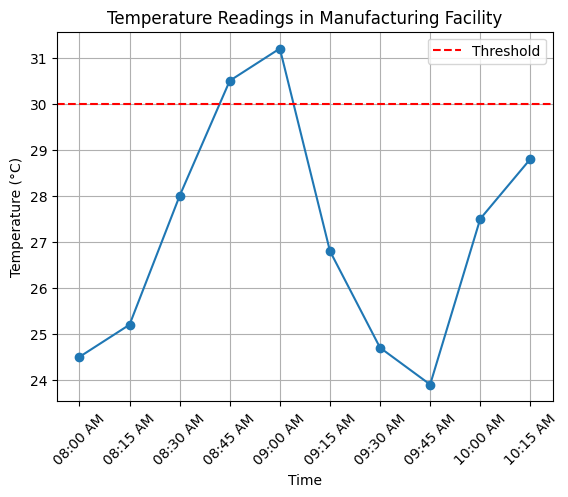

In [ ]:
import matplotlib.pyplot as plt

time = ['08:00 AM', '08:15 AM', '08:30 AM', '08:45 AM', '09:00 AM', '09:15 AM', '09:30 AM', '09:45 AM', '10:00 AM', '10:15 AM']
temperature = [24.5, 25.2, 28.0, 30.5, 31.2, 26.8, 24.7, 23.9, 27.5, 28.8]

plt.plot(time, temperature, marker='o')
plt.axhline(y=30, color='r', linestyle='--', label='Threshold')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Readings in Manufacturing Facility')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Monitoring Air Quality in a City

The dataset contain
Timestamps when the measurements were taken.
Latitude of monitoring stations.
Longitude  of the same monitoring stations.


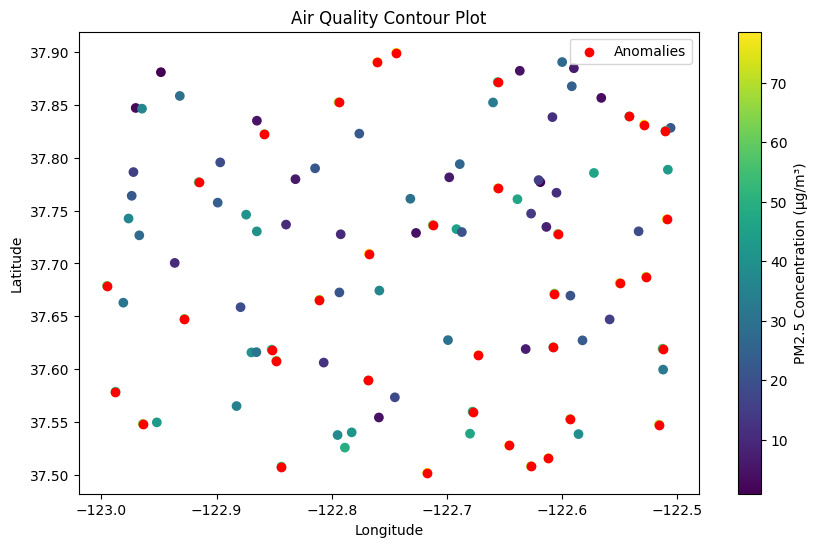

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
num_points = 100
time = np.random.randint(1, 24, num_points)
latitude = np.random.uniform(37.5, 37.9, num_points)
longitude = np.random.uniform(-122.5, -123, num_points)
pm25_concentration = np.random.uniform(0, 80, num_points)  # µg/m³

# Set the threshold for PM2.5 concentration
threshold = 50  # µg/m³

# Create a mask for data points exceeding the threshold
anomaly_mask = pm25_concentration > threshold

# Create a contour plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=pm25_concentration, cmap='viridis')
plt.colorbar(label='PM2.5 Concentration (µg/m³)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Air Quality Contour Plot')
plt.scatter(longitude[anomaly_mask], latitude[anomaly_mask], color='red', label='Anomalies')
plt.legend()
plt.show()


Another example with a contour plot

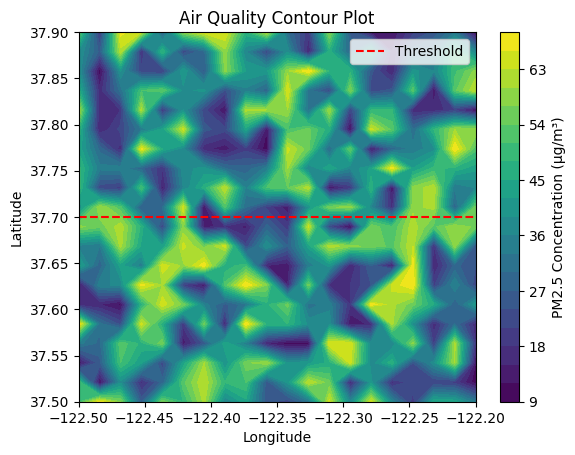

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
latitude = np.linspace(37.5, 37.9, 20)  # Latitude coordinates
longitude = np.linspace(-122.2, -122.5, 20)  # Longitude coordinates
X, Y = np.meshgrid(longitude, latitude)  # Create a grid

# Generate fictional PM2.5 concentration data
PM25_data = np.random.randint(10, 70, size=(20, 20))  # Random PM2.5 values

# Set threshold for anomaly detection
threshold = 50  # µg/m³

# Create a contour plot
plt.contourf(X, Y, PM25_data, levels=20, cmap='viridis')
plt.colorbar(label='PM2.5 Concentration (µg/m³)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Air Quality Contour Plot')
plt.axhline(y=37.7, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# URL of the CSV file
url = 'https://raw.githubusercontent.com/niranjanmeegammana/ML-master/main/01_EDA/world_air_quality.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(url)
df

,City,Latitude,Longitude,AQI
0,Santiago,-33.4489,-70.6693,156
1,Dhaka,23.8103,90.4125,152
2,Beijing,39.9042,116.4074,138
3,Lahore,31.5497,74.3436,115
4,Kolkata,22.5726,88.3639,110
...,...,...,...,...
102,Kyoto,35.0116,135.7681,6
103,Pristina,42.6629,21.1655,6
104,Kabul,34.5553,69.2075,4
105,Rome,41.9028,12.4964,4


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


# Create a GeoDataFrame using latitude and longitude columns
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


In [51]:
gdf

,City,Latitude,Longitude,AQI,geometry
0,Santiago,-33.4489,-70.6693,156,POINT (-70.66930 -33.44890)
1,Dhaka,23.8103,90.4125,152,POINT (90.41250 23.81030)
2,Beijing,39.9042,116.4074,138,POINT (116.40740 39.90420)
3,Lahore,31.5497,74.3436,115,POINT (74.34360 31.54970)
4,Kolkata,22.5726,88.3639,110,POINT (88.36390 22.57260)
...,...,...,...,...,...
102,Kyoto,35.0116,135.7681,6,POINT (135.76810 35.01160)
103,Pristina,42.6629,21.1655,6,POINT (21.16550 42.66290)
104,Kabul,34.5553,69.2075,4,POINT (69.20750 34.55530)
105,Rome,41.9028,12.4964,4,POINT (12.49640 41.90280)


<ipython-input-52-8f3807433ec7>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

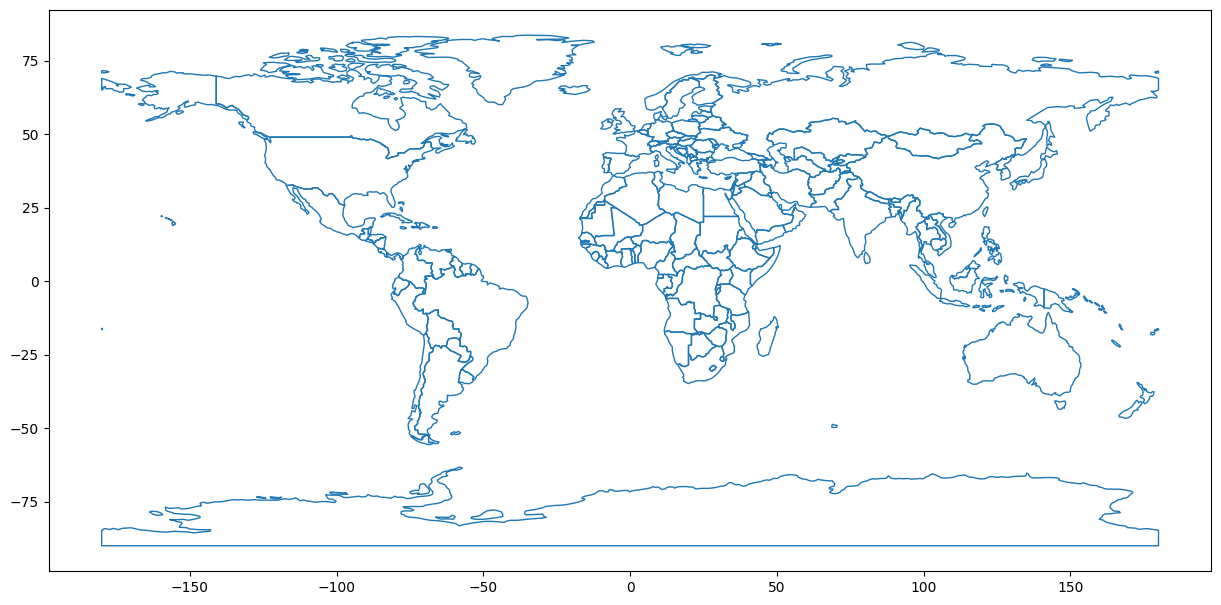

In [52]:
# Plotting the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

In [ ]:
# Encode city names to avoid non-numeric characters
gdf['Encoded_City'] = gdf['City'].str.encode('utf-8')
gdf

<ipython-input-55-2582a57e1f99>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


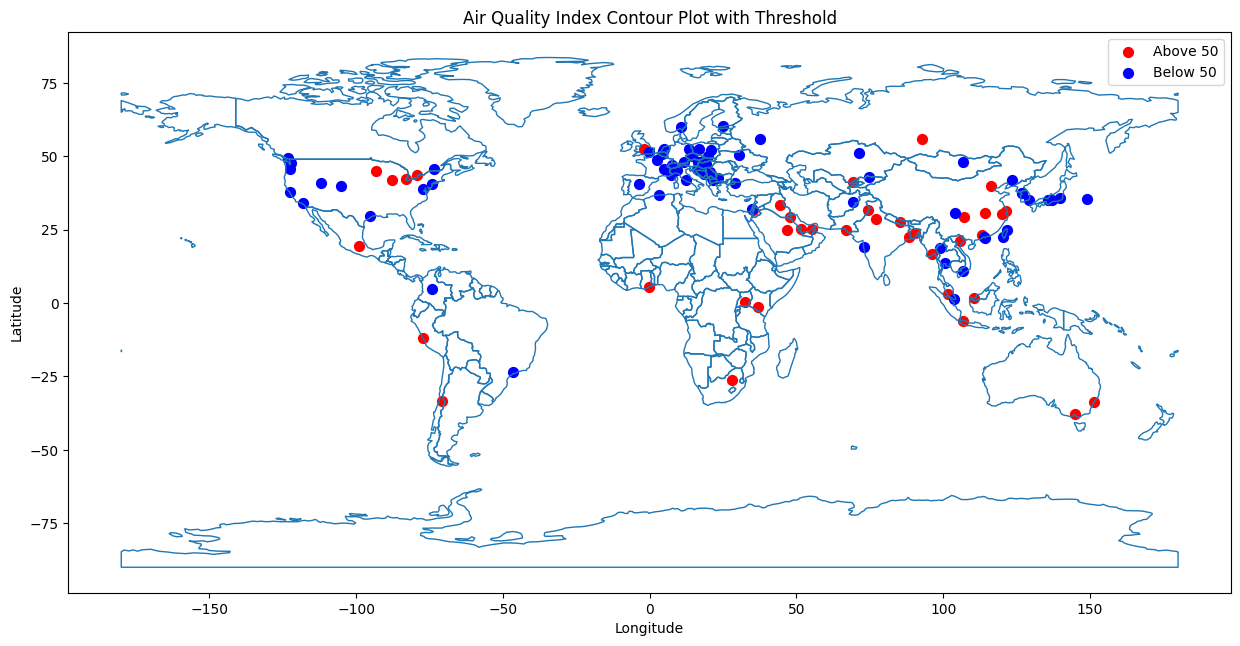

In [55]:

# Create a GeoDataFrame using latitude and longitude columns
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plotting the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# Encode city names to avoid non-numeric characters
gdf['Encoded_City'] = gdf['City'].str.encode('utf-8')

# Plot points with AQI above threshold in red and below threshold in blue
gdf[gdf['AQI'] > 50].plot(ax=ax, color='red', markersize=50, label='Above 50')
gdf[gdf['AQI'] <= 50].plot(ax=ax, color='blue', markersize=50, label='Below 50')

plt.title('Air Quality Index Contour Plot with Threshold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
